In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Admission_Predict.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
df.drop('Serial No.', axis=1, inplace=True)

In [7]:
df.rename(columns={'GRE Score': 'gre', 'TOEFL Score': 'toefl', 'University Rating' : 'uni_rank', 'SOP' : 'sop', 'LOR ' : 'lor', 'CGPA' : 'cgpa', 'Research' : 'research', 'Chance of Admit ': 'chance'}, inplace=True)

<AxesSubplot:>

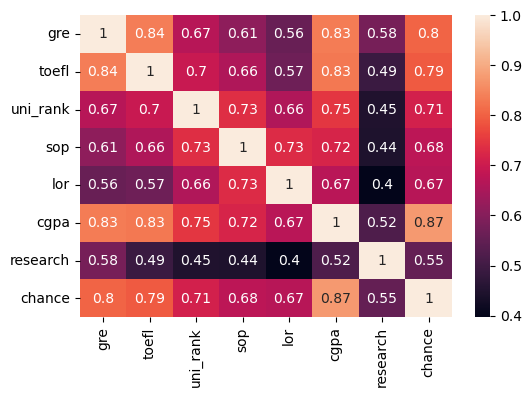

In [8]:
plt.figure(dpi=100)
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='chance', ylabel='gre'>

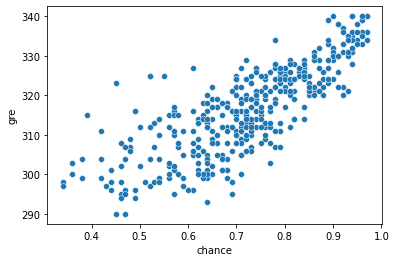

In [9]:
plt.figure(200)
sns.scatterplot(data=df, x='chance', y='gre')

<AxesSubplot:xlabel='chance', ylabel='toefl'>

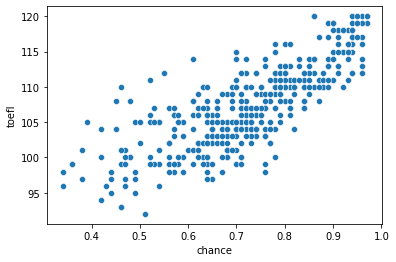

In [10]:
plt.figure(200)
sns.scatterplot(data=df, x='chance', y='toefl')

<AxesSubplot:xlabel='chance', ylabel='cgpa'>

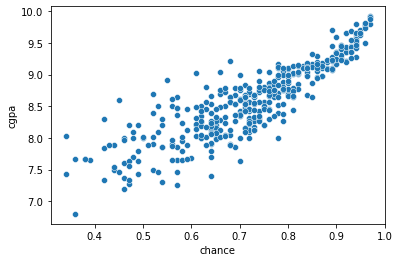

In [11]:
plt.figure(200)
sns.scatterplot(data=df, x='chance', y='cgpa')

<AxesSubplot:xlabel='chance', ylabel='Density'>

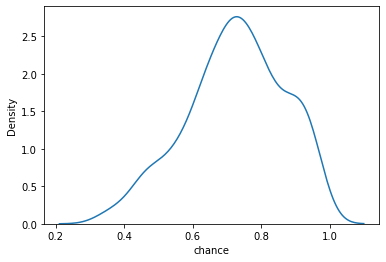

In [12]:
plt.figure(200)
sns.kdeplot(data=df, x='chance')

<Figure size 900x600 with 0 Axes>

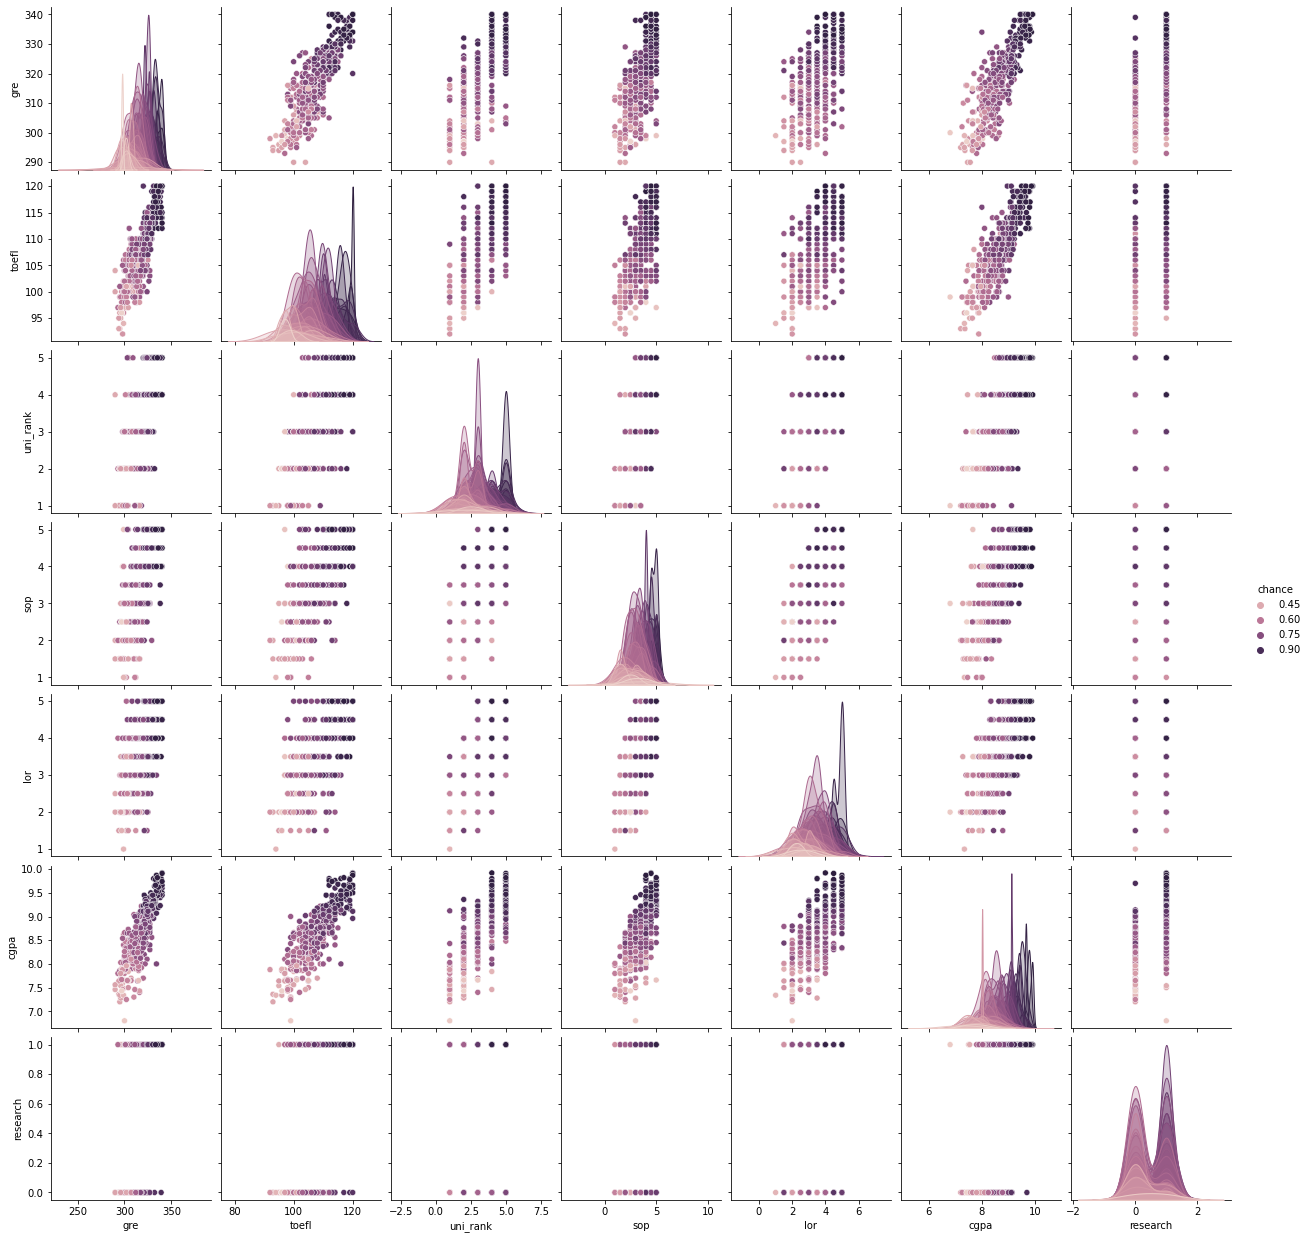

In [13]:
plt.figure(dpi=150)
sns.pairplot(df,hue='chance')

In [14]:
X = df.drop('chance', axis=1)

In [15]:
y = df.chance

In [16]:
X

,gre,toefl,uni_rank,sop,lor,cgpa,research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [17]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: chance, Length: 400, dtype: float64

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
rg = LinearRegression()

In [20]:
Serial No.	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
X_train.shape

(268, 7)

In [22]:
rg.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = rg.predict(X_test)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score

In [25]:
mean_absolute_error(y_test, y_pred)

0.04784904474370713

In [26]:
mean_squared_error(y_test, y_pred)

0.004375639657717104

In [27]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.06614861795772534

In [28]:
test_residuals = y_test - y_pred

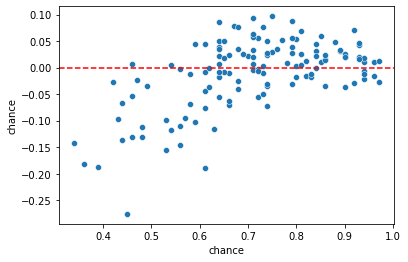

In [29]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', ls='--')

In [30]:
prediction = [[319, 107, 3, 3, 3, 9, 1]]

In [31]:
rg.predict(prediction)

/home/egorlagunovich/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.77720591])

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1, 10):
    
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(poly_features, y, test_size=0.33, random_state=42)
    
    model = LinearRegression()
    model.fit(X_new_train, y_new_train)
    
    train_pred = model.predict(X_new_train)
    test_pred = model.predict(X_new_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_new_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_new_test, test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [34]:
train_rmse_errors

[0.06222718608283876,
 0.05819524288643173,
 0.04845826031045208,
 0.00035445323414480464,
 0.00017157215559540344,
 8.460998149851261e-05,
 0.00020116978862032587,
 0.00021337003252997781,
 0.0003203968187806199]

In [35]:
test_rmse_errors

[0.06614861795772525,
 0.06726769545446083,
 0.10007241654780606,
 3.5014326941837988,
 1.5850568204808506,
 1.9299174492756963,
 2.0291631079219883,
 1.9982610862518626,
 1.9381735824075277]

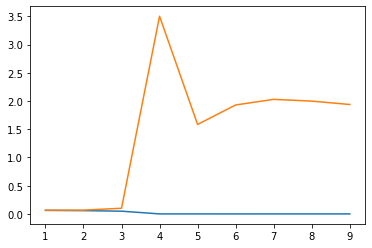

In [36]:
plt.plot(range(1,10), train_rmse_errors, label='Train RMSE')
plt.plot(range(1,10), test_rmse_errors, label='Test RMSE')

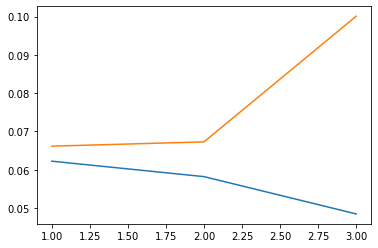

In [37]:
plt.plot(range(1,4), train_rmse_errors[:3], label='Train RMSE')
plt.plot(range(1,4), test_rmse_errors[:3], label='Test RMSE')

In [39]:
df_predict = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [41]:
df_predict

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [42]:
df_predict.rename(columns={'GRE Score': 'gre', 'TOEFL Score': 'toefl', 'University Rating' : 'uni_rank', 'SOP' : 'sop', 'LOR ' : 'lor', 'CGPA' : 'cgpa', 'Research' : 'research', 'Chance of Admit ': 'chance'}, inplace=True)

In [44]:
df_predict.drop('Serial No.', axis=1, inplace=True)

In [45]:
X_pr = df_predict.drop('chance', axis=1)

In [46]:
y_pr = df_predict.chance

In [50]:
y_pred_2 = rg.predict(X_pr)

In [51]:
np.sqrt(mean_squared_error(y_pr, y_pred_2))

0.05950420877764952